# Student's Percentage Prediction Model
## TASK 1

### To Explore Supervised Machine Learning.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data



In [1]:
# Importing All required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Using Scikit-Learn's built-in train_test_split() method and Linear Model:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Lets get to know how the data looks like

In [2]:
url_link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df_student = pd.read_csv(url_link)
df_student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Checking if there are any null values in the dataset
df_student.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#Performing EDA on the dataset
df_student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualisation 
### Lets plot a Scatterplot of Study Hours vs Percentage

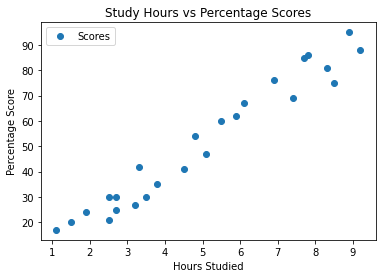

In [5]:
df_student.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Regressor Plot

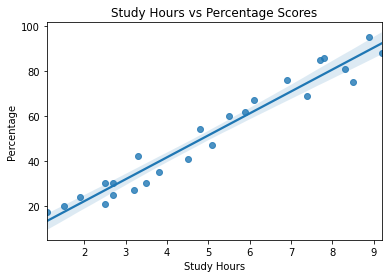

In [6]:
#Plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=df_student['Hours'],y=df_student['Scores'],data=df_student)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()



#  Linear Regression Model

## Now we prepare the data and split it in test data


In [7]:
x1 = df_student[['Hours']]
y = df_student[['Scores']]

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 42)


# Training the Model

In [8]:
Model_regressor = LinearRegression()
Model_regressor.fit(X_train,y_train)
print("Co-eeficipent of Predictor Variable:", Model_regressor.coef_)

print ("Intercept - ",Model_regressor.intercept_)
#Here we obtain our model


Co-eeficipent of Predictor Variable: [[9.71409219]]
Intercept -  [2.48036709]


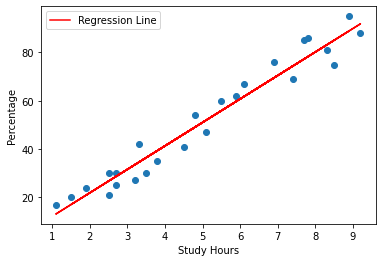

In [9]:
# Plotting the regression line
line = Model_regressor.coef_*x1 + Model_regressor.intercept_

# Plotting for the test data
plt.scatter(x1, y)
plt.plot(x1, line,color='red', label='Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Testing  And Predicting Values with the Model

In [10]:
# Testing data - In Hours
Y_predicted = Model_regressor.predict(X_test)
Y_predicted = np.asarray(Y_predicted)
df = pd.DataFrame({'Actual': np.asarray(y_test).flatten(), 'Predicted': Y_predicted.flatten()})  
df

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


In [11]:
#Estimating training and test score
print("Training Score:",Model_regressor.score(X_train,y_train))
print("Test Score:",Model_regressor.score(X_test,y_test))


Training Score: 0.9514783240656937
Test Score: 0.9553509219739938


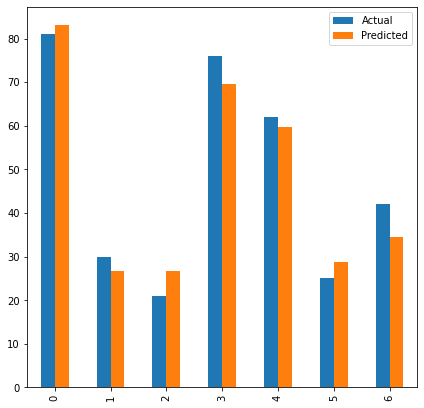

In [122]:
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='minor', linewidth='1', color='black')
plt.show()

In [12]:
# Testing with some new data
hours = [9.25]
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = Model_regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred.flatten()))

No of Hours = [9.25]
Predicted Score = [92.33571987]


# Model Evaluation Metrics

In [134]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Y_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_predicted)))
print('R-2:', metrics.r2_score(y_test, Y_predicted))

Mean Absolute Error: 4.425394675156183
Mean Squared Error: 23.516396034595225
Root Mean Squared Error: 4.8493706843873285
R-2: 0.9553509219739938


### Conclusion: We can see the value of the root mean squared error is 4.849. Here root mean squared error is less than 10% of the mean value of the percentages of all the student scores. Hence, it is safe to conclude that the model did a decent job to predict the the student score as 92.33 % when student studies for 9.25 hours.